<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT22/blob/hannahklingberg-lab4/Lab4/hannahklingberg_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 4: Approximation**
**Hanna Klingberg**

# **Abstract**

This lab explores function approximation using projection onto subspaces. More specifically, $L^2$ projection is used to approximate two functions. The results of the approximations are plotted and compared to the actual functions. 

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [ ]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [ ]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np
import scipy.integrate as integrate


#try:
#    from dolfin import *; from mshr import *
#except ImportError as e:
#    !apt-get install -y -qq software-properties-common 
#    !add-apt-repository -y ppa:fenics-packages/fenics
#    !apt-get update -qq
#    !apt install -y --no-install-recommends fenics
#    from dolfin import *; from mshr import *
    
#import dolfin.common.plotting as fenicsplot

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

This lab explores methods to approximate functions, in this case using $L^2$ projection onto a 1D mesh. The theory behind the function is described in the method section, as well as the approach to testing. 

# **Method**

In this lab we approximate functions by doing an $L^2$ projectioon of $f \in L^2(I)$ onto the space $V^{(1)}_h$. (As stated in example 9.8, chapter 9.5, course book). The projection can be expressed as:
$P_hf(x) = \sum_{j=0}^{m+1} α_j ϕ_j (x)$

Where $α$ is determined by the equation $A α = b$
With $A = a_{ij}$, $a_{ij} = (ϕ_j ϕ_i) $ and $ b_i = (f, ϕ_i)$

From the example it is given that:

$a_{kk} = \frac{h_k}{3} + \frac{h_{k+1}}{3} $ $a_{kk+1} = \frac{h_{k+1}}{6}$ and $a_{kk-1} = \frac{h_k}{6}$

b is calulated according to equation 9.20 in course book:

$b_k = \int_{I_k} f(x) λ_{k,1}(x) dx + \int_{I_{k+1}} f(x) λ_{k+1,0}(x) dx $

The algorithm, based on the pseudocode in Algorithm 9.2 in course book, iteratively assembles the A matrix and b vector by computing local elements of both, and then mapping them to their global counterparts. The projection, as previously mentioned given by $A α = b$, is then given by solving the equation. 

The tests are done by approximating two different functions, $x^2$ and $cos(x)$ , and iterating through increasing mesh sizes and plotting the results. 


In [ ]:
def integrate_matrix(k,i,j,mesh):
  h = mesh[k+1]-mesh[k]
  if i == j:
    return h/3
  else:
    return h/6


In [ ]:
def integrate_vector(f,k,i,mesh):
  x0, x1 = mesh[k], mesh[k+1]
  if i == 0:
    return integrate.quad(lambda x: f(x)* (x1-x) / (x1-x0), x0, x1)[0]
  else:
    return integrate.quad(lambda x: f(x) * (x-x0) / (x1-x0), x0, x1)[0] 

In [ ]:
def l2_projection(f, mesh):
  N = len(mesh)
  b = np.zeros(N)
  A = np.zeros((N,N))
  for k in range(N-1):
    q = 2
    A_local = np.zeros((q,q))
    b_local = np.zeros(q)
    for i in range(q):
      b_local[i] = integrate_vector(f,k,i,mesh)
      for j in range(q):
        A_local[i][j] = integrate_matrix(k,i,j,mesh)
    b[k:k+q] += b_local
    A[k:k+q,k:k+q] += A_local
  
  solution = np.linalg.solve(A,b)
  return solution


In [ ]:
def test_l2():
  
  x = np.linspace(0,10,100)
  f = lambda x: x**2
  mesh_sizes = [5, 10, 15, 30]
  for i in mesh_sizes:
    mesh = np.linspace(0,10, i)
    alpha = l2_projection(f, mesh)
    plt.plot(x, f(x))
    plt.plot(mesh, alpha)
    plt.title("approximation with mesh size %d" %(i))
    plt.show()

  x = np.linspace(0,10,100)
  f = lambda x: np.cos(x)
  mesh_sizes = [5, 10, 15, 25]
  for i in mesh_sizes:
    mesh = np.linspace(0,10, i)
    alpha = l2_projection(f, mesh)
    plt.plot(x, f(x))
    plt.plot(mesh, alpha)
    plt.title("approximation with mesh size %d" %(i))
    plt.show()


# **Results**

As described in the method section, the tests consists of iterating through increasing mesh sizes and ploting the result, along with the actual function. As can be seen in the plots, when the mesh size increases the approximation gets closer until it's indistinguishable from the actual function. It is clear that a mesh size over 25 gives a very good approximation. 

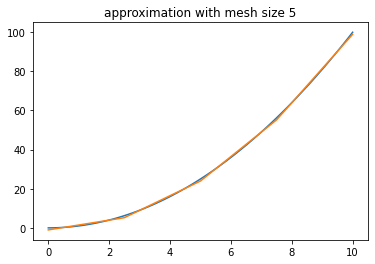

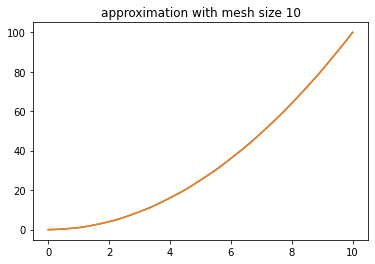

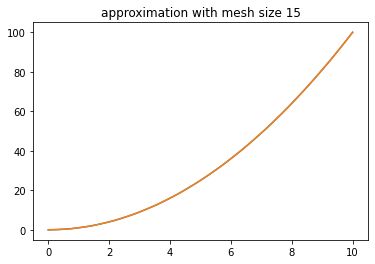

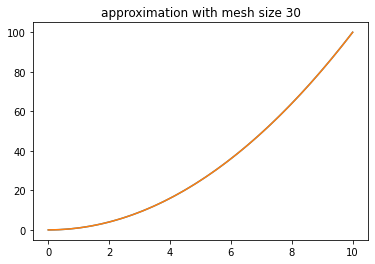

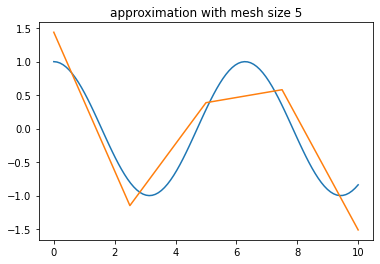

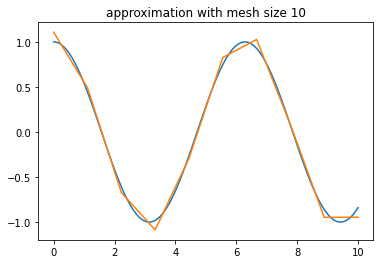

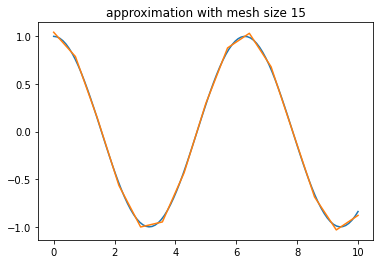

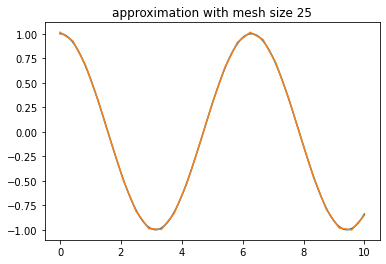

In [ ]:
test_l2()

# **Discussion**

The approximation worked really good and it is very clear that it gets better with increasing mesh size. I thought this lab was a bit tricky to implement since not a lot of information was given in the book, and so I had to discuss a lot with a classmate and also consult previous students work to get an image of the setup of the lab. 